In [1]:
import pandas as pd

# Set display option to show all rows
pd.set_option('display.max_rows', 4150)

# Load data
df = pd.read_csv('bank-additional.csv')

# Show all rows
df


,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"30;""blue-collar"";""married"";""basic.9y"";""no"";""ye..."
1,"39;""services"";""single"";""high.school"";""no"";""no""..."
2,"25;""services"";""married"";""high.school"";""no"";""ye..."
3,"38;""services"";""married"";""basic.9y"";""no"";""unkno..."
4,"47;""admin."";""married"";""university.degree"";""no""..."
5,"32;""services"";""single"";""university.degree"";""no..."
6,"32;""admin."";""single"";""university.degree"";""no"";..."
7,"41;""entrepreneur"";""married"";""university.degree..."
8,"31;""services"";""divorced"";""professional.course""..."
9,"35;""blue-collar"";""married"";""basic.9y"";""unknown..."


In [2]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

#Load the dataset
df = pd.read_csv('bank-additional.csv', sep=';')

#Encode categorical variables
data = df.copy()
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

#Define features and target
X = data.drop('y', axis=1)
y = data['y']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Build and train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

#Export tree rules in text format
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- duration <= 567.50
|   |--- nr.employed <= 5087.65
|   |   |--- duration <= 165.50
|   |   |   |--- class: 0
|   |   |--- duration >  165.50
|   |   |   |--- class: 1
|   |--- nr.employed >  5087.65
|   |   |--- cons.conf.idx <= -48.55
|   |   |   |--- class: 0
|   |   |--- cons.conf.idx >  -48.55
|   |   |   |--- class: 0
|--- duration >  567.50
|   |--- duration <= 832.00
|   |   |--- euribor3m <= 1.32
|   |   |   |--- class: 1
|   |   |--- euribor3m >  1.32
|   |   |   |--- class: 0
|   |--- duration >  832.00
|   |   |--- month <= 7.50
|   |   |   |--- class: 1
|   |   |--- month >  7.50
|   |   |   |--- class: 0



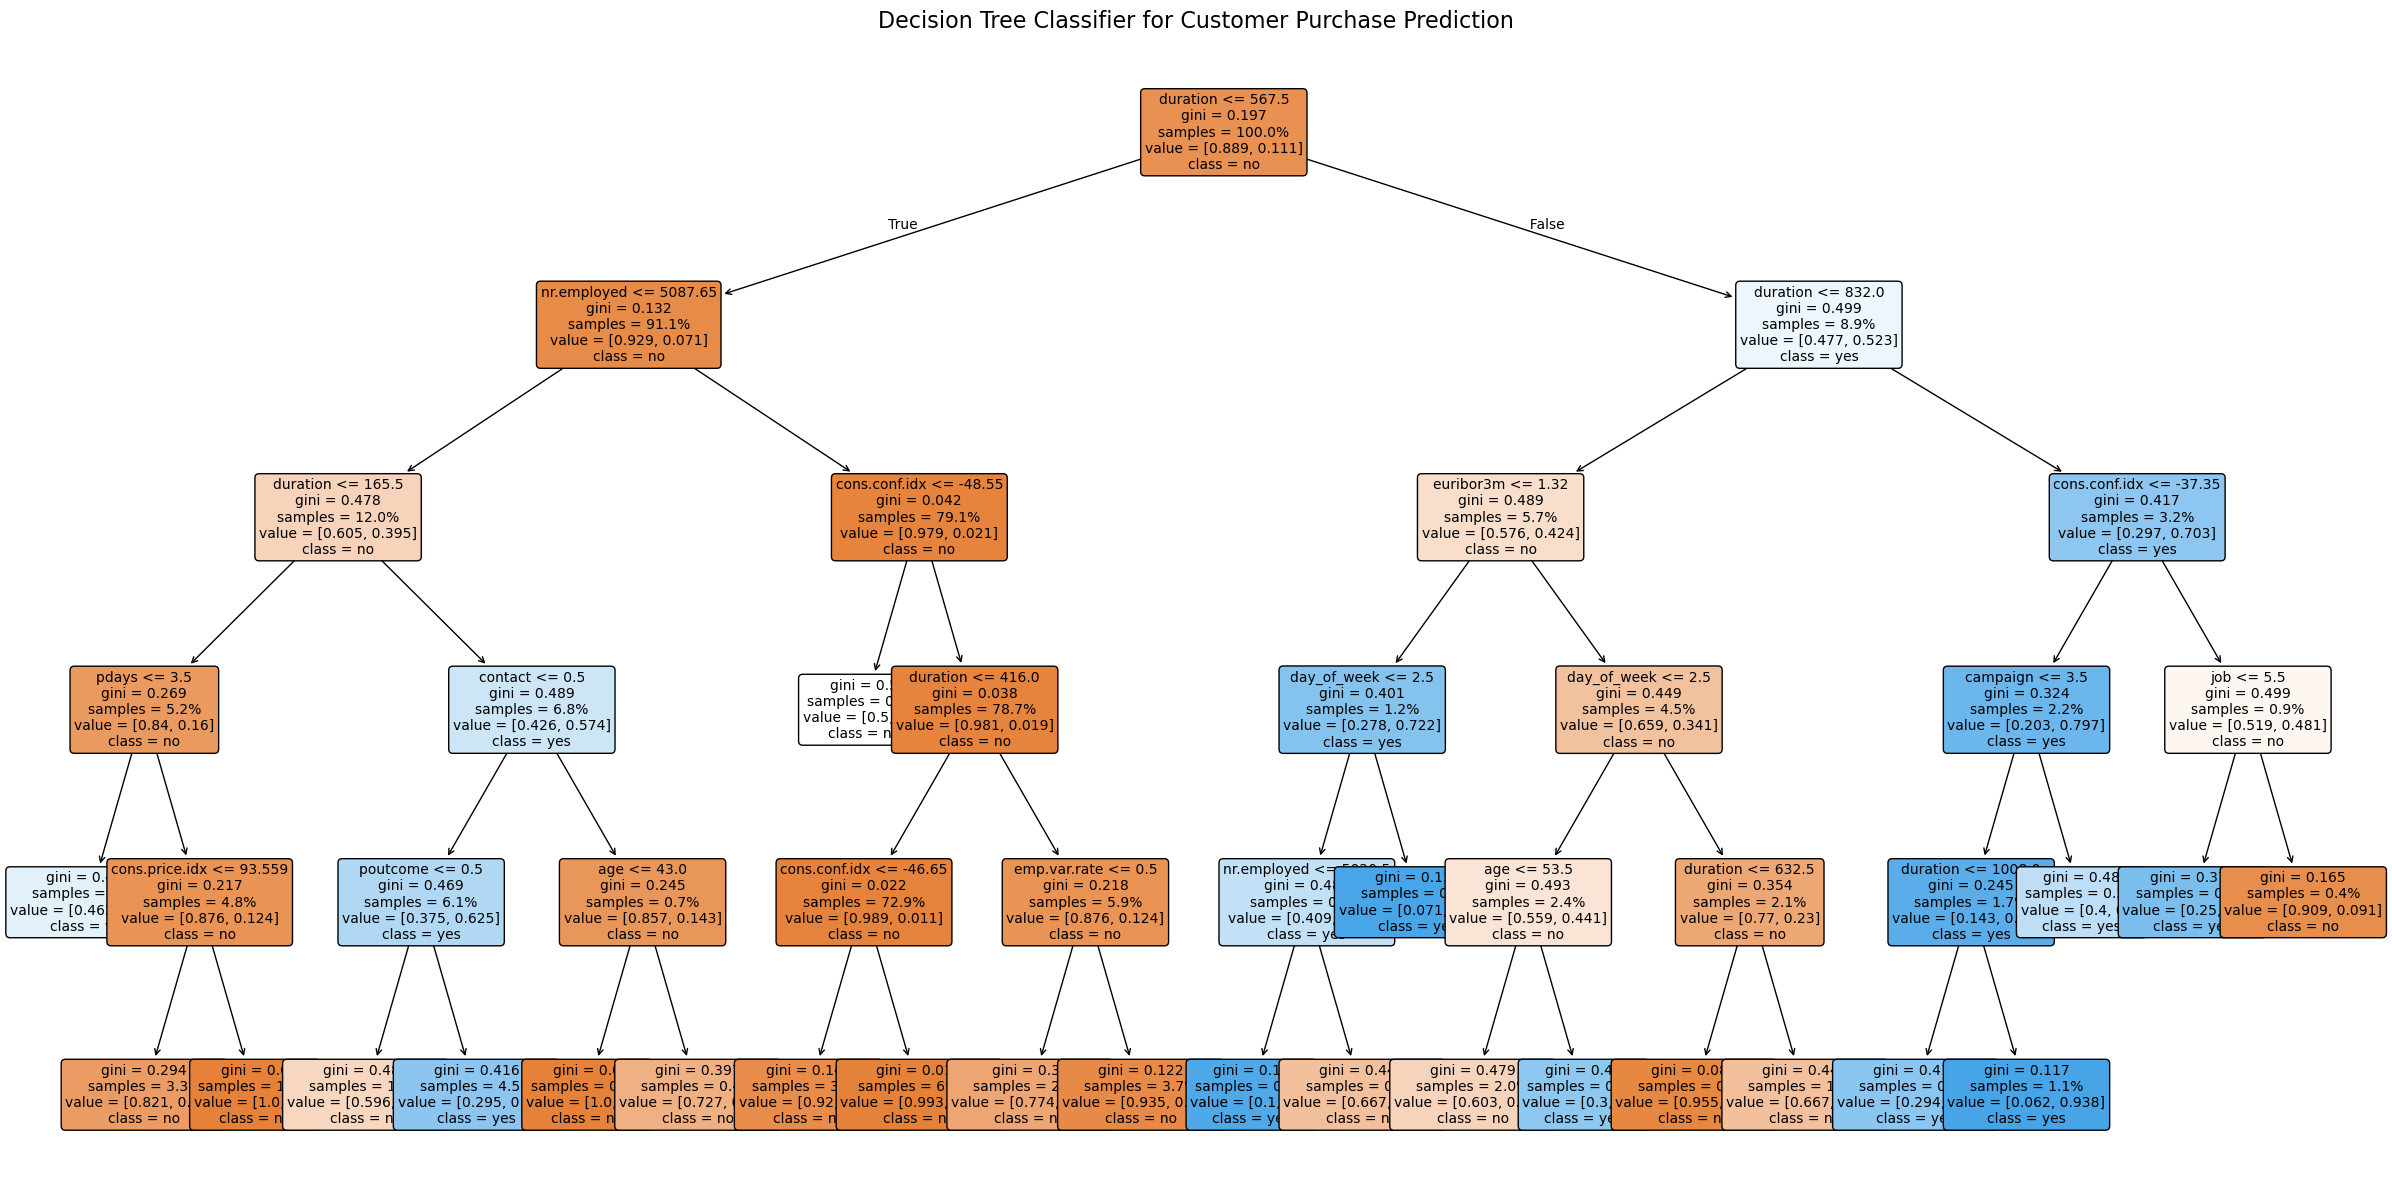

Training Accuracy: 93.20%
Test Accuracy: 89.89%


In [3]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

#Load the dataset
df = pd.read_csv('bank-additional.csv', sep=';')  # Make sure the CSV is in your working directory

#Encode categorical variables
data = df.copy()
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

#Define features and target
X = data.drop('y', axis=1)
y = data['y']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#Build and train the Decision Tree Classifier
clf = DecisionTreeClassifier(
    max_depth=5,      # Increased depth for more detail
    min_samples_leaf=10,  # Minimum samples per leaf to avoid overfitting
    random_state=42
)
clf.fit(X_train, y_train)

#Plot the Decision Tree
plt.figure(figsize=(30, 15))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=label_encoders['y'].classes_,  # 'no' and 'yes'
    filled=True,
    rounded=True,
    fontsize=10,
    impurity=True,  # Show Gini impurity in each node
    proportion=True # Show class distribution as percentages
)
plt.title("Decision Tree Classifier for Customer Purchase Prediction", fontsize=16)
plt.show()

#Check accuracy
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.2%}")
print(f"Test Accuracy: {test_acc:.2%}")
